In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## **1. 학습 진행**

### **1. Sequential model**

In [2]:
# Sequential 클래스
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [3]:
# 점진적으로 Sequential 모델 만들기
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [4]:
# 가중치를 만들기 위해 모델을 호출합니다
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.08215928, -0.24898413,  0.07142678,  0.05538231, -0.13596779,
         -0.1681898 ,  0.01447412, -0.01806447,  0.15138939, -0.18678501,
         -0.08933933,  0.13819754, -0.15642032,  0.08709237, -0.13357452,
          0.24217254,  0.17171949,  0.25160778, -0.22227514, -0.07958606,
         -0.13617356,  0.24598646,  0.2890365 , -0.21975943,  0.14248481,
          0.00578222, -0.12244061,  0.1986002 , -0.06613429,  0.04151207,
         -0.08820412,  0.19526151, -0.10474053, -0.12642115, -0.10821086,
         -0.26059136,  0.03282487,  0.23127812,  0.13524804,  0.14024785,
          0.22629982,  0.26786178,  0.16443548,  0.01943725,  0.2764848 ,
         -0.1829301 , -0.10013983,  0.05460382,  0.04944861, -0.0705031 ,
          0.12048185, -0.16553895,  0.01603362,  0.13148925,  0.15503588,
          0.27787519, -0.01456958, -0.2650973 ,  0.02819264, -0.22764003,
         -0.0086199 , -0.23063749,  0.08082

In [5]:
# summary 메서드
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# name 매개변수로 모델과 층에 이름 지정하기
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 모델의 입력 크기를 미리 지정하기
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **2. Functional API model**

In [9]:
# (간단한 예제) 두 개의 Dense 층을 가진 간단한 함수형 모델
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
inputs = keras.Input(shape=(3,), name="my_input")

In [11]:
inputs.shape

TensorShape([None, 3])

In [12]:
inputs.dtype

tf.float32

In [13]:
features = layers.Dense(64, activation="relu")(inputs)

In [14]:
features.shape

TensorShape([None, 64])

In [15]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# 다중 입력, 다중 출력 함수형 모델
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [17]:
# 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 11ms/step


In [18]:
# 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 10ms/step


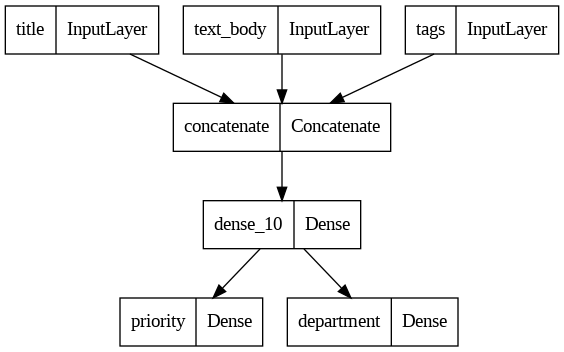

In [19]:
# 함수형 API의 장점: 층 연결 구조 활용하기
keras.utils.plot_model(model, "ticket_classifier.png")

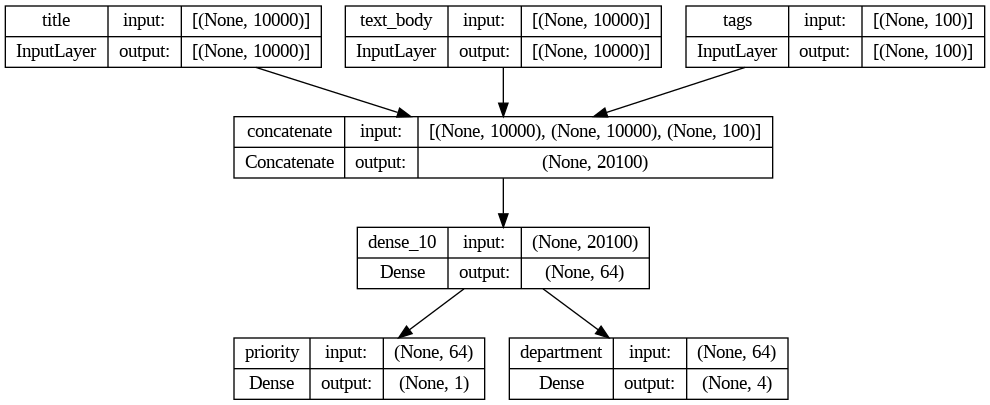

In [20]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [21]:
# 함수형 모델에 있는 층의 입력과 출력을 출력하기
model.layers

In [22]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [23]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [24]:
# 중간 층의 출력을 재사용해 새로운 모델 만들기
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

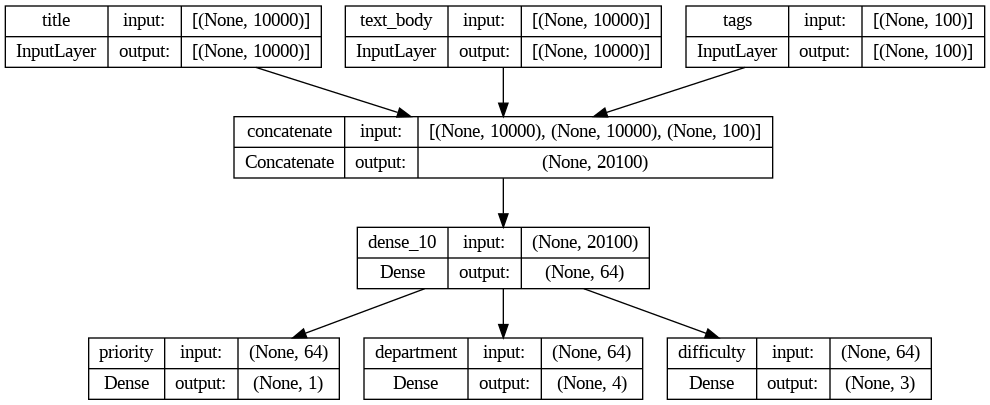

In [25]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### **3. Subclassing model**

**이전 예제를 서브클래싱 모델로 다시 만들기**

In [26]:
# 간단한 서브클래싱 모델
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [27]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [28]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 8ms/step


### **4. Mixing model**

**주의: 서브클래싱된 모델이 지원하지 않는 것**

In [29]:
# 여러 방식을 혼합하여 사용하기
# 서브클래싱한 모델을 포함하는 함수형 모델 만들기
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [30]:
# 함수형 모델을 포함하는 서브클래싱 모델 만들기
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### **5.사용자 정의 훈련 스탭을 사용하는 모델**

In [31]:
# 모델 만들기(나중에 재사용할 수 있도록 별도의 함수로 만들기)
def get_mnist_model():
  inputs = keras.Input(shape=(28 * 28, ))
  features = layers.Dense(512, activation='relu')(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation='softmax')(features)
  model = keras.Model(inputs, outputs)
  return model

In [32]:
(images, labels), (test_images, test_labels) = mnist.load_data() # 데이터 로드, 검증 위해 떼어 놓음
images = images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

11490434/11490434 [==============================] - 0s 0us/step


In [33]:
# 지도 학습을 위한 훈련 스텝
def train_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
  gradients = tape.gradients(loss, model.trainable_weights)
  optimizer.apply_gradients(zip(model.trainable_weights, gradients))

In [34]:
# 측정 지표의 저수준 사용법
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f'결과: {current_result:.2f}')

결과: 1.00


In [35]:
# 모델의 손실처럼 스칼라 값의 평균을 추적해야 할 수도 있음.
# keras.metrics.Mean을 사용해서 이를 처리할 수 있음.
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
  mean_tracker.update_state(value)
print(f'평균 지표: {mean_tracker.result():.2f}')

평균 지표: 2.00


(훈련 에포크나 평가를 시작할 때처럼) 현재 결과르 재설정하고 싶을 때 `metric.reset_state()`를 사용해야 함.

정방향 패스, 역방향 패스, 지표 추적을 fit()과 유사한 훈련 스텝 함수로 연결해보자.

이 함수는 데이터와 타겟의 배치를 받고 fit() 진행 표시줄이 출력하는 로그를 반환함

In [36]:
# 단계별 훈련 루프 작성하기 : 훈련 스텝 함수
model = get_mnist_model()  # 모델 불러오기

loss_fn = keras.losses.SparseCategoricalCrossentropy() # 손실함수 준비하기
optimizer = keras.optimizers.RMSprop() # 옵티마이저 준비하기
metrics = [keras.metrics.SparseCategoricalAccuracy()] # 모니터링할 지표 리스트 준비하기
loss_tracking_metric = keras.metrics.Mean() # 손실 평균을 추적할 평균 지표 준비하기

def train_step(inputs, targets):
  # 정방향 패스를 실행함
  # training=True를 전달함
  with tf.GradientTape() as tape:
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
  # 역방향 패스를 실행함
  # model.trainable_weights를 사용함
  gradients = tape.gradient(loss, model.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  logs = {}
  # 측정지표 계산하기
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs[metric.name] = metric.result().numpy()
    # 손실 평균 계산하기
    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result().numpy()
    # 지표와 손실의 현재 값을 반환
    return logs

In [37]:
# 매 에포크 시작과 평가 전에 지표의 상태를 재설정해야 함.
# 단계별 훈련 루프 작성하기 : 지표 재설정
def reset_metrics():
  for metric in metrics:
    metric.reset_state()
  loss_tracking_metric.reset_state()

In [38]:
# 완전한 훈련 루프를 구성할 수 있음.
# tf.data.Dataset 객체를 사용해 데이터를 크기가 32인 배치로 데이터를 순회하는 반복자로 바꿈
# 단계별 훈련 루프 작성하기 : 훈련 루프 자체
training_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 10
for epoch in range(epochs):
  reset_metrics()
  for inputs_batch, targets_batch in training_dataset:
    logs = train_step(inputs_batch, targets_batch)
  print(f'{epoch}번째 에포크 결과')
  for key, value in logs.items():
    print(f'...{key}: {value:.4f}')

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9146
...loss: 0.2905
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9536
...loss: 0.1609
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9621
...loss: 0.1324
3번째 에포크 결과
...sparse_categorical_accuracy: 0.9681
...loss: 0.1142
4번째 에포크 결과
...sparse_categorical_accuracy: 0.9724
...loss: 0.1055
5번째 에포크 결과
...sparse_categorical_accuracy: 0.9740
...loss: 0.0964
6번째 에포크 결과
...sparse_categorical_accuracy: 0.9759
...loss: 0.0913
7번째 에포크 결과
...sparse_categorical_accuracy: 0.9773
...loss: 0.0843
8번째 에포크 결과
...sparse_categorical_accuracy: 0.9785
...loss: 0.0791
9번째 에포크 결과
...sparse_categorical_accuracy: 0.9797
...loss: 0.0741


In [39]:
# 단계별 평가 루프 작성하기
def test_step(inputs, targets):
  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)

  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs['val_'+metric.name] = metric.result()
  loss_tracking_metric.update_state(loss)
  logs['val_loss'] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print('평가 결과:')
for key, value in logs.items():
  print(f'...{key}: {value:.4f}')

평가 결과:
...val_sparse_categorical_accuracy: 0.9761
...val_loss: 0.1011


기본적으로 동일한 로직을 구현했지만 직접 작성한 루프가 케라스에 내장된 fit()과 evaluate() 메서드보다 훨씬 느리게 실행됨.

기본적으로 tensorflow 코드는 numpy나 일반적인 python 코드와 비슷하게 즉시(eagerly) 라인 단위로 실행되기 때문임.

**즉시 실행(eager execution)**은 코드 디버깅을 쉽게 만들어주나, 성능 측면에서는 최적이 아님.

tensorflow 코드는 계산 그래프(computation graph)로 컴파일하는 것이 더 성능이 좋음.

컴파일하고 싶은 함수에 `@tf.function` 데코레이터(decorator)를 추가하면,

라인 단위로 해석되는 코드에서는 할 수 없는 전역적인 최적화가 가능함.

In [40]:
# 평가 스텝 함수에 @tf.function 데코레이터 추가하기

@tf.function  # @tf.function 데코레이터 추가

def test_step(inputs, targets):
  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)

  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs['val_'+metric.name] = metric.result()
  loss_tracking_metric.update_state(loss)
  logs['val_loss'] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print('평가 결과:')
for key, value in logs.items():
  print(f'...{key}: {value:.4f}')

평가 결과:
...val_sparse_categorical_accuracy: 0.9761
...val_loss: 0.1011


사용자 정의 훈련 알고리즘이 필요하지만 케라스에 내장된 훈련 로직의 기능을 활용하고 싶다면, **사용자 정의 훈련 스텝 함수를 제공**하고 **나머지 처리는 프레임워크에 위임**할 수 있음.

In [41]:
# fit()이 사용할 사용자 정의 훈련 스텝 구현하기
loss_fn = keras.losses.SparseCategoricalCrossentropy()
# 이 객체는 훈련과 평균 과정에서 배치 손실의 평균을 추적함
loss_tracker = keras.metrics.Mean(name='loss')

class CustomModel(keras.Model):
  # train_step 메서드를 오버라이딩함
  def train_step(self, data):
    inputs, targets = data
    with tf.GradientTape() as tape:
      # 모델이 클래스 자체이므로 model(inputs, training=True) 대신에 self(inputs, training=True)를 사용함
      predictions = self(inputs, training=True)
      loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
    # 손실의 평균을 추적하는 loss_tracker를 업데이트
    loss_tracker.update_state(loss)
    # 평균 손실을 구함
    return {'loss': loss_tracker.result()}

@property
# 에포크마다 재설정할 지표는 여기에 나열해야 함
def metrics(self):
  return [loss_tracker]

In [42]:
# 이제 사용자 정의 모델의 객체를 만들고, 컴파일하고
# 보통 때처럼 fit() 메서드로 훈련할 수 있음.
inputs = keras.Input(shape=(28 * 28, ))
features = layers.Dense(512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation='softmax')(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4509
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2563
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2088
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1832
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1665
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1543
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1447
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1368
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1304
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1244


몇 가지 주의할 점이 있음.
* 이 패턴 때문에 함수형 API로 모델을 만드는 데 문제가 되지 않음. Sequential 모델, 함수형 모델, 서브클래싱 모델을 만드는지에 상관없이 이 방식을 사용할 수 있음.
* 이 프레임워크가 알아서 처리하기 때문에 train_step 메서드를 오버라이딩할 때 @tf.function 데코레이터를 사용할 필요가 없음.

In [43]:
class CustomModel(keras.Model):
  def train_step(self, data):
    inputs, targets = data
    with tf.GradientTape() as tape:
      predictions = self(inputs, training=True)
      # self.compiled_loss를 사용해서 손실을 계산함
      loss = self.compiled_loss(targets, predictions)
    gradients = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
    # self.compiled_metrics로 모델의 지표 업데이트
    self.compiled_metrics.update_state(targets, predictions)
    # 측정 지표 이름과 현재 값을 매핑한 딕셔너리를 반환함
    return {m.name: m.result() for m in self.metrics}

In [44]:
# 테스트하기
inputs = keras.Input(shape=(28 * 28, ))
features = layers.Dense(512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation='softmax')(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2953 - sparse_categorical_accuracy: 0.9120
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1622 - sparse_categorical_accuracy: 0.9524
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1325 - sparse_categorical_accuracy: 0.9623
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1170 - sparse_categorical_accuracy: 0.9681
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0.9709
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0948 - sparse_categorical_accuracy: 0.9746
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9758
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0.9766
Epoch 9/10
1563/1563 [===

***

## **2. 실험**

### **1. 모델 학습에서 어떤 일이 일어나는지 직접 확인하기**

[최적의 조합을 찾아보세요! 사이트](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3,2&seed=0.80809&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### **2. 최적의 조합을 찾아보세요!, Classification - data type 1**

**Classification - data type 4**

1. H1. 입력 층 vs 입력 뉴런 개수
* layer 2개부터는 6 * 8 표현과 비슷하게 표현한다.

2. + one layer
- 뒤에 layer 모양을 더 잘 따르는 듯한 느낌
- 부족하지만 더 명확하게 판단 시작


**Regression - data type 2**
* 1개 선택, Baseline보다 loss가 높게 분포, 성능이 좋지 않음.
* 2개 선택, 기본 피쳐를 대체하여 가공된 피쳐를 넣을 경우, Loss값이 증가하게 됨. 기본 피쳐는 필수적으로 사용해야 한다고 판단하고 추후 실험.
* layer, 모델의 레이어가 깊어져도 유의미한 성능향상이 없었고, 오히려 너무 깊어지면 로스가 크게 튀는걸 볼 수 있음. 레이어가 넓어질 수록 성능이 조금 올라가지만, 과적합에 유의해야 함.
* learning rate, 학습이 멈추는 에폭은 학습률 & 모델의 복잡도 등 여러 요인들에 의해 기하급수적으로 바뀌어서 매번 다른 학습률을 지정하여 여러 환경마다 테스트 해보는 것이 필요함
* **tanh 가 sigmoid보다 훨씬 빨랐다.** 1) 시그모이드 함수는 오파역전파 수행 시 기울기가 소실되는 문제가 발생 입력의 절대값이 크면 0~1로 수렴하면서 그래디언트를 소멸시켜 버리기 때문이다. 2) 탄젠트함수는 결과값이 (-1,1)이고, 중심값이 0으로 양수와 음수가 나오는 비중이 비슷해 zigzag현상이 덜하다

**Tabular Data : Optimizer / batch size**
* ReLU(0.2, 0.5)
  * ReLU(0.2) - accuracy : 0.098, loss : 2.303
  * ReLU(0.5) - accuracy : 0.116, loss : 2.302
* Sigmoid(0.2, 0.5)
  * Sigmoid(0.2) - accuracy : 0.9524, loss : 0.1604
  * Sigmoid(0.5) - accuracy : 0.9536, loss : 0.1596

- Image Data : Layer의 구성이 달라지는 경우 1
    - 레이어 모듈에 변화가 있는 경우
    - Conv - Maxpool // Conv - Conv - Maxpool

- Convolutional 층: 여러개의 필터를 적용해 이미지에서 특징을 추출할 때 사용
- Max Pooling 층: 특징 맵의 차원을 줄이는 데 사용+주요특징을 추출하면서 과적합을 줄임+모델의 과적합 방지
- conv-maxpool vs conv-conv-maxpool : 조사 결과: 첫 conv에선 기본적인 패턴 | 두번째 conv에서는 더 복잡한 패턴을 학습

- conv-conv-maxpool
  - convolutional layer가 두 개일 때, testset의 accuarcy가 조금 더 높았음.
파란색 그래프의 loss를 보면 conv 레이어가 1개일 때 적정 에폭은 5로 보이고, conv 2개일 때는 4가 적정 에폭으로 보임. conv가 2개일 때 학습이 더 잘 된다고 할 수 있음.
데이터가 복잡하지 않을 때, conv 2개 모델이 과적합이 일어날 가능성이 높음.
  - 추가로 conv - droput(0.5) - conv 레이어 층으로 구성해서 돌려봄
  - 위 레이어들에 비해 정확도가 아주 약간 적게 나왔지만, train loss값과 val loss값을 비교해봤을 때 Dropout을 통해 과적합 문제에 집중하여 개선된 모델이라고 볼 수 있을 것 같다.